###### Code For Item Based Collaborative Filtering ######

In [1]:
# importing the packages needed for item based collaborative filtering 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [20]:
# the data was retrieved from "https://grouplens.org/datasets/movieLens/"
movie_data_df = pd.read_csv('C:\\Users\\HOME\\movie-recommender-system-master\\ml-100k\\ml-100k\\u.data', sep='\t', names=['user_id','movie_id','rating','timestamp'])

In [3]:
# data check
movie_data_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [21]:
# here we are adding the movie title and joining with the main data
movie_titles = pd.read_csv('C:\\Users\\HOME\\movie-recommender-system-master\\ml-100k\\ml-100k\\Movie_Titles.csv',encoding= 'unicode_escape')
movie_data_df = pd.merge(movie_data_df,movie_titles, on='movie_id')
movie_data_df

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)
...,...,...,...,...,...
80403,655,1645,4,892871225,The Devil's Advocate (1997)
80404,747,1659,1,888733313,Hurricane Streets (1997)
80405,916,1682,3,880845755,"Truman Show, The (1998)"
80406,840,1674,4,891211682,Witness (1985)


In [22]:
# statistical features of the data 
# in rating colum we are seeing "80408" differnet entereies in the data
# and the mean is "3.54" rating
movie_data_df.describe()


,user_id,movie_id,rating,timestamp
count,80408.000000,80408.000000,80408.000000,8.040800e+04
mean,462.781315,390.062867,3.544498,8.835046e+08
std,267.392254,321.315923,1.119424,5.350778e+06
min,1.000000,1.000000,1.000000,8.747247e+08
25%,253.000000,168.000000,3.000000,8.794466e+08
50%,449.000000,293.000000,4.000000,8.828208e+08
75%,683.000000,521.000000,4.000000,8.882102e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [23]:
# creating mean rating data to capture the mean rating for all movies
ratings_df = pd.DataFrame(movie_data_df.groupby('title')['rating'].mean())
ratings_df.head()

,rating
title,
'Til There Was You (1997),2.548387
1-900 (06) (1994),3.384615
101 Dalmatians (1996),4.200000
12 Angry Men (1957),4.047619
187 (One Eight Seven) (1997),1.666667


In [24]:
# creating number of rating data
# how many the movie has been rated
ratings_df ['number_of_ratings']= pd.DataFrame(movie_data_df.groupby('title')['rating'].count())
ratings_df.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (06) (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (One Eight Seven) (1997),1.666667,3


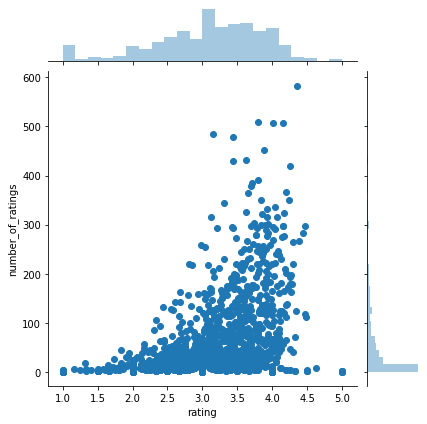

In [29]:
#plotting the jointplot to 
#find the distribution of rating and number of rating

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x= 'rating', y='number_of_ratings', data=ratings_df)

In [30]:
# creating user-item interaction matrix 
# to find the relation between individual users and individual movies 
# NaN=0 means no rating entries
movie_matrix_UII = movie_data_df.pivot_table(index='user_id', columns='title', values='rating').fillna(0)
movie_matrix_UII.head()

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (8Â½) (1963),...,"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Most rated movies
ratings_df.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
"Usual Suspects, The (1995)",4.358491,583
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485
Natural Born Killers (1994),3.441423,478
Toy Story (1995),3.878319,452
Quiz Show (1994),3.631090,431
"Boys of St. Vincent, The (1992)",3.438228,429


In [61]:
#Making recommendation example for City Hall
#Fetching rating for City Hall
movie_user_rating = movie_matrix_UII['Quiz Show (1994)']

In [62]:
movie_user_rating

user_id
1      0.0
2      4.0
3      2.0
4      5.0
5      0.0
      ... 
939    0.0
940    5.0
941    4.0
942    5.0
943    0.0
Name: Quiz Show (1994), Length: 943, dtype: float64

In [63]:
#Finding the correlation with different movies (on the similar rating)
similar_to_movie_user_rating=movie_matrix_UII.corrwith(movie_user_rating)

In [64]:
#Observing the result
similar_to_movie_user_rating.head()

title
'Til There Was You (1997)       0.002150
1-900 (06) (1994)               0.025315
101 Dalmatians (1996)          -0.050060
12 Angry Men (1957)            -0.014258
187 (One Eight Seven) (1997)    0.039224
dtype: float64

In [70]:
# Making the most meaningful recommendation 
correlation_movie_user_rating = pd.DataFrame(similar_to_movie_user_rating, columns= ['Correlation with user rating'])
correlation_movie_user_rating.dropna(inplace=True)
correlation_movie_user_rating.head()

,Correlation with user rating
title,
'Til There Was You (1997),0.002150
1-900 (06) (1994),0.025315
101 Dalmatians (1996),-0.050060
12 Angry Men (1957),-0.014258
187 (One Eight Seven) (1997),0.039224


In [71]:
correlation_movie_user_rating = correlation_movie_user_rating.join(ratings_df['number_of_ratings'])
correlation_movie_user_rating.head()

,Correlation with user rating,number_of_ratings
title,,
'Til There Was You (1997),0.002150,31
1-900 (06) (1994),0.025315,13
101 Dalmatians (1996),-0.050060,5
12 Angry Men (1957),-0.014258,21
187 (One Eight Seven) (1997),0.039224,3


In [73]:
correlation_movie_user_rating[correlation_movie_user_rating['number_of_ratings'] > 20].sort_values(by='Correlation with user rating',ascending=False).head(10)

,Correlation with user rating,number_of_ratings
title,,
Quiz Show (1994),1.000000,431
Tales from the Crypt Presents: Demon Knight (1995),0.433329,295
"Relic, The (1997)",0.351982,136
To Live (Huozhe) (1994),0.322436,175
"Arrival, The (1996)",0.315639,316
Swimming with Sharks (1995),0.312167,218
Tommy Boy (1995),0.311387,251
Village of the Damned (1995),0.308874,143
"Perez Family, The (1995)",0.297304,485
